**V následující úloze si ukážeme praktický příklad využití družicových dat. Na základě rozdílu NDVI indexů z let 2006 a 2011, vyhodnotíme požkození lesa. Snímky jsou s výřezu Landsat 5 TM, z oblasti, kde došlo k požkození (větrný polom, a kůrovcová kalamita).**

In [35]:
library(raster)

Nejdříve zkusíme vizuálně porovnat snímky ve viditelných RBG barvách:

In [30]:
rgb_2006<-stack("../../data/landsat/20060831_rgb.tif")

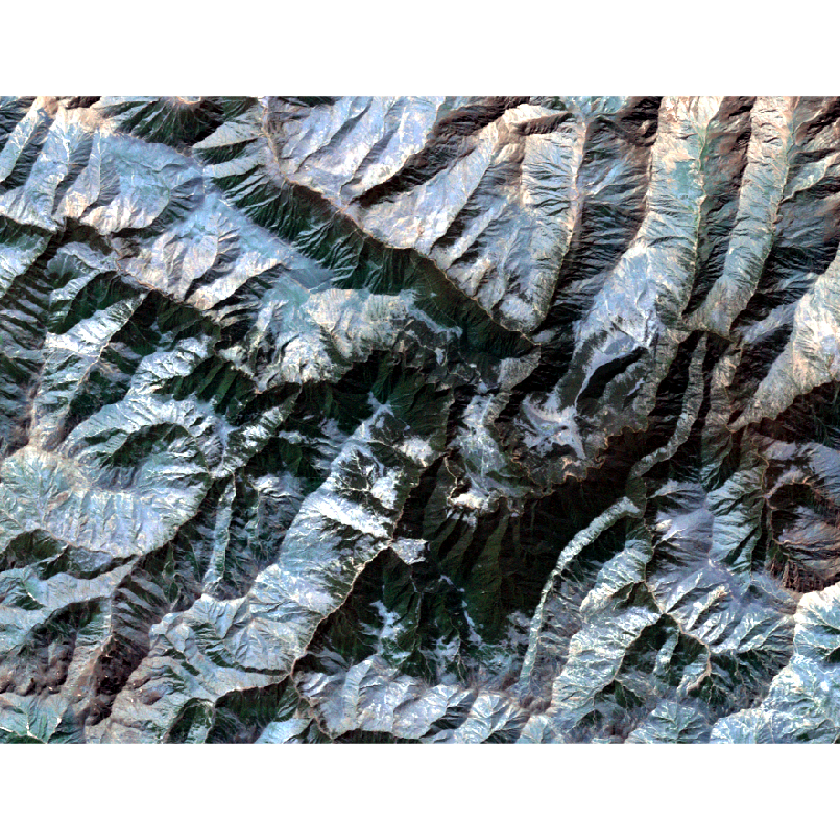

In [33]:
plotRGB(rgb_2006,r=3,g=2,b=1,stretch="lin")

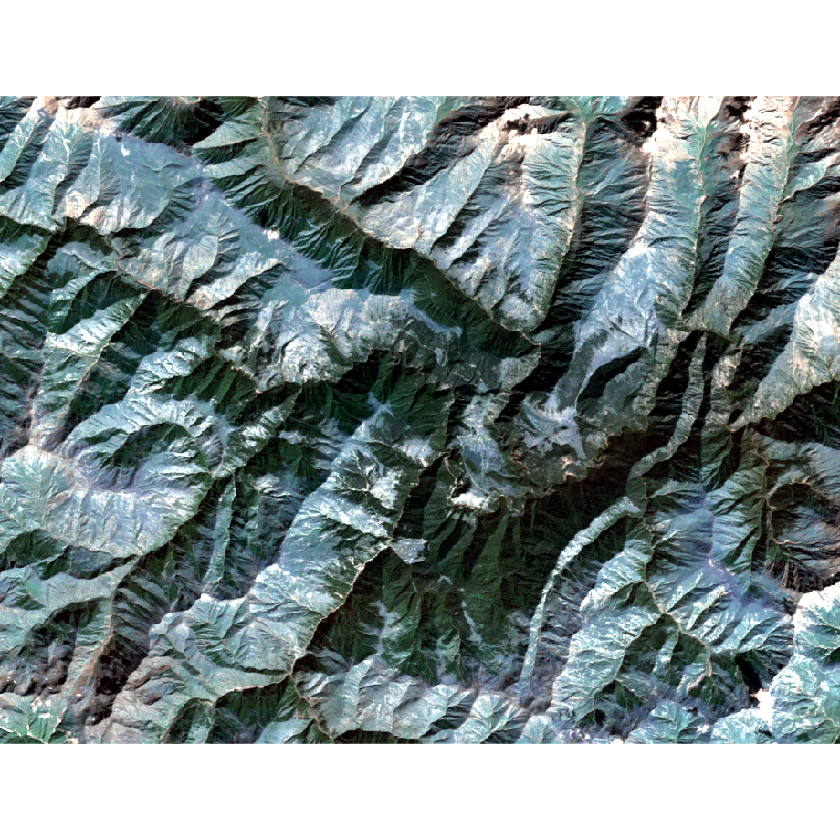

In [36]:
rgb_2011<-stack("../../data/landsat/20110914_rgb.tif")
plotRGB(rgb_2011,r=3,g=2,b=1,stretch="lin")

Vvtvoříme RasterStack se dvěma rastry - ndvi indexy z let 2006 a 2011. NDVI jsou vypočteny se stejných snímků jako předchozí RGB.

In [37]:
dat_s<-stack(list.files(path="../../data/landsat/", pattern="clip",full.name=T))

In [38]:
dat_s

class       : RasterStack 
dimensions  : 683, 886, 605138, 2  (nrow, ncol, ncell, nlayers)
resolution  : 30, 30  (x, y)
extent      : 536955, 563535, 4681485, 4701975  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=38 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       : clip_LT05_L1TP_169031_20060831_20161119_01_T1_sr_ndvi, clip_LT05_L1TP_169031_20110914_20161006_01_T1_sr_ndvi 


In [15]:
names(dat_s)<-c("ndvi_2006","ndvi_2011")
dat_s

class       : RasterStack 
dimensions  : 683, 886, 605138, 2  (nrow, ncol, ncell, nlayers)
resolution  : 30, 30  (x, y)
extent      : 536955, 563535, 4681485, 4701975  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=38 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
names       : ndvi_2006, ndvi_2011 


**Vytvoříme rastr rozdílu NDVI**

In [24]:
diff<-dat_s[[2]]-dat_s[[1]]
diff

class       : RasterLayer 
dimensions  : 683, 886, 605138  (nrow, ncol, ncell)
resolution  : 30, 30  (x, y)
extent      : 536955, 563535, 4681485, 4701975  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=38 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : in memory
names       : layer 
values      : -4741, 4455  (min, max)


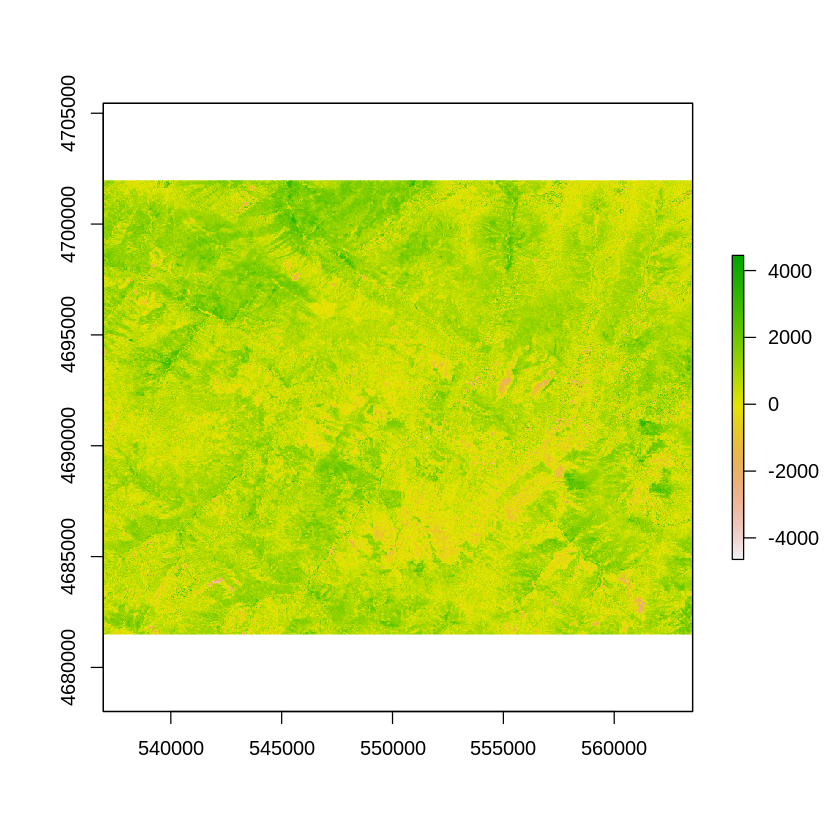

In [19]:
plot(diff)

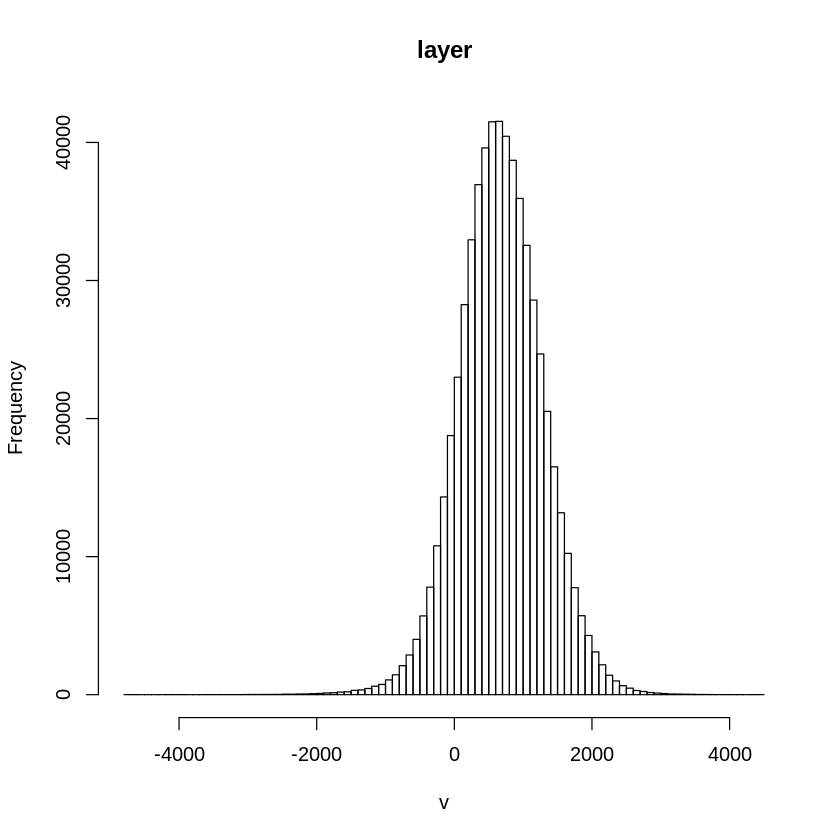

In [21]:
hist(diff,nclass=100)

Jednou z možností jak data reklasifikovat je vytvoření masky - rastru s hodnotami 1 a 0. Toho lze v R docílít logické operace se zadáním prahové hodnoty.

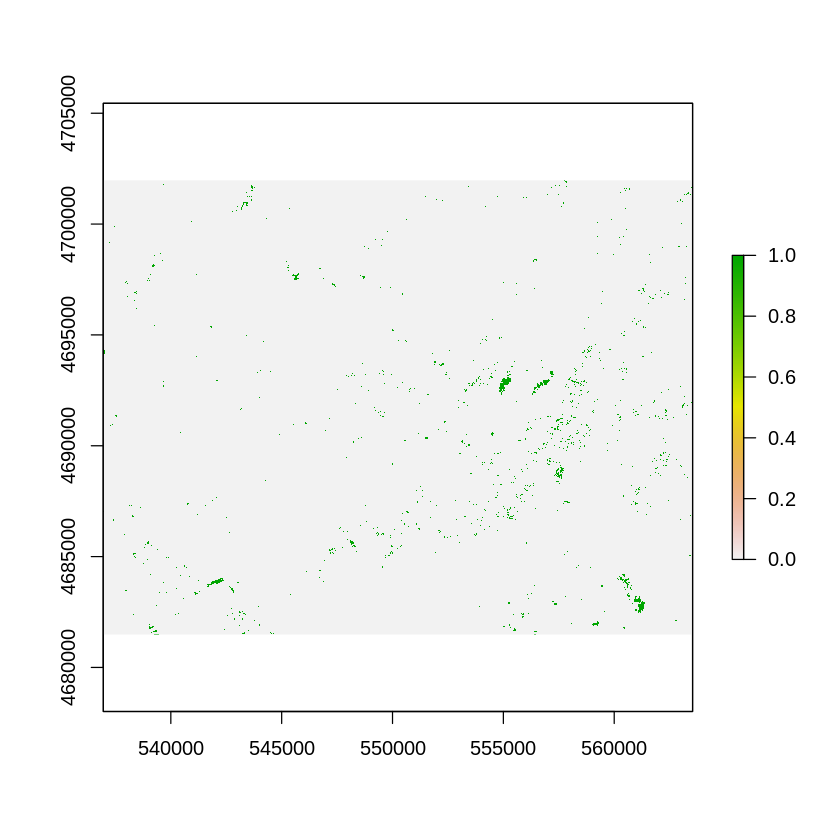

In [27]:
diff_1000 <- diff < -1000
plot(diff_1000)

#nebo:
#diff[diff > -1000] <- NA

DAlší možností je funkce `raster::reclassify`, která nám vytvoří kategorizovaný rastr:

In [75]:
diff_reclass=reclassify(diff,c(-Inf,-500,-1,-500,1000,NA,1000,Inf,1))

In [100]:
diff_reclass

,layer
Min.,-1
1st Qu.,1
Median,1
3rd Qu.,1
Max.,1
NA's,416228


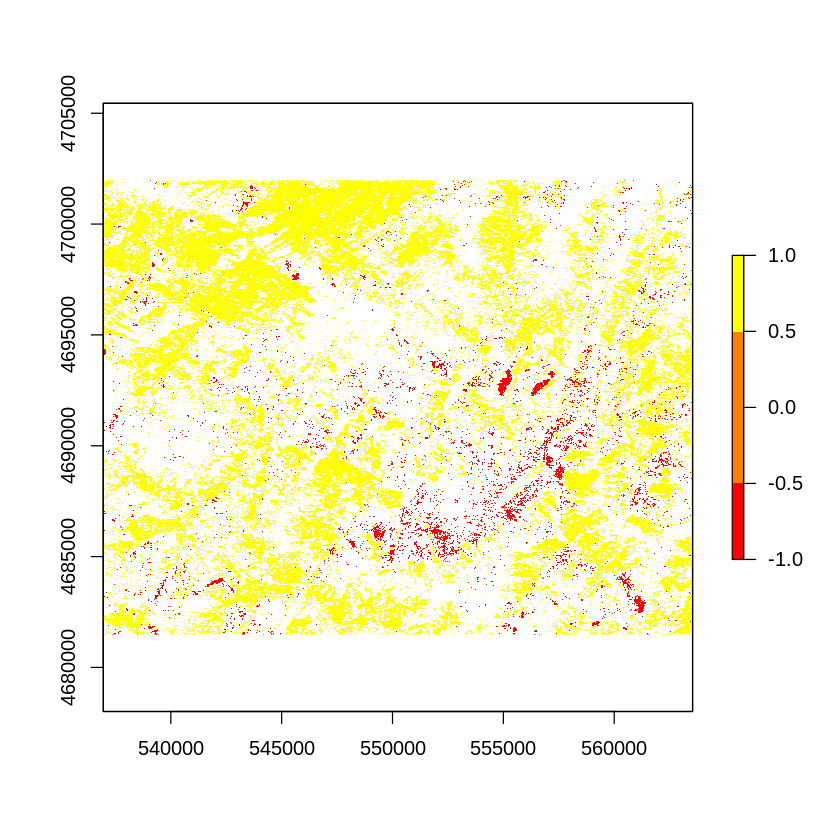

In [98]:
plot(diff_reclass,col=heat.colors(3))

Na výsledný rastr, můžeme použít filtr pomocí raster::focal

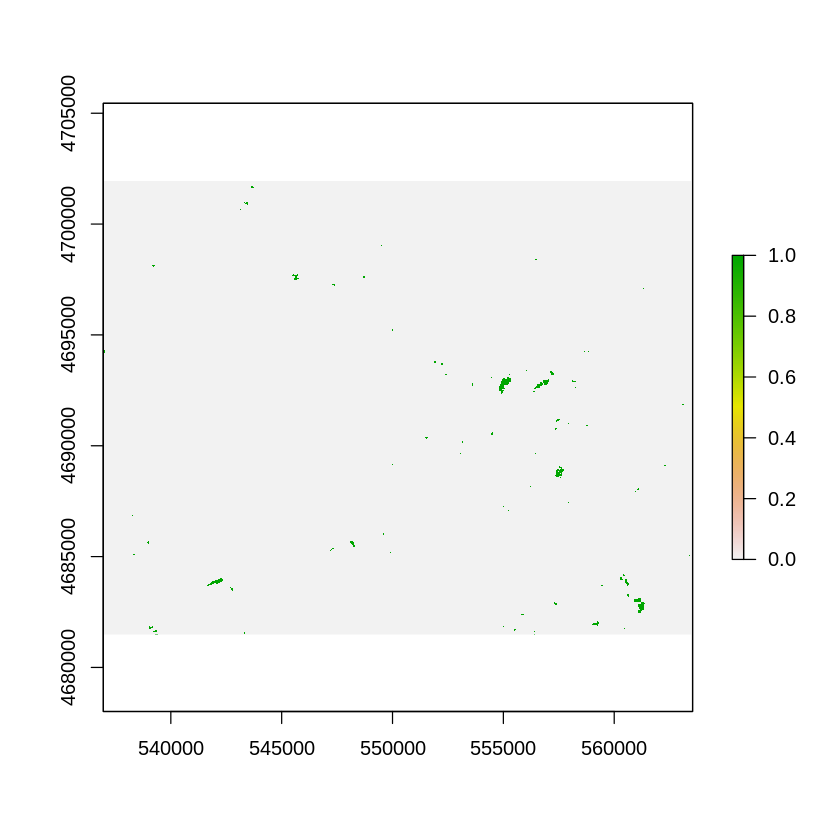

In [66]:
plot(focal(diff_1000,matrix(1,3,3),fun=modal))

In [56]:
?focal